In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../SOM-LVQ')
from supervisedSom import supervisedSom
from random import randrange
from minisom import MiniSom

In [2]:
train = pd.read_csv(r"..\data\SD-2X_rocktype.csv")
x_train = train.iloc[:, 0:6].values
y_train = train.iloc[:, 6].values
y_train[y_train==4] = 0

In [3]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)

In [4]:
test = pd.read_csv(r"..\data\SD-3X_rocktype.csv")
x_test = test.iloc[:, 0:6].values
y_test = test.iloc[:, 6].values
y_test[y_test==4] = 0
x_test = minmax.transform(x_test)

In [5]:
# Create a random subsample from the dataset with replacement
def subsample(x, y, ratio):
    sample_x = list()
    sample_y = list()
    n_sample = round(len(x) * ratio)
    while len(sample_x) < n_sample:
        index = randrange(len(x))
        sample_x.append(x[index])
        sample_y.append(y[index])
    return [np.asarray(sample_x), np.asarray(sample_y)]

In [6]:
# Bootstrap Aggregation Algorithm
def bagging(x_train, y_train, x_test, sample_size, n_LVQ):
    trees = list()
    for i in range(n_LVQ):
        sample = subsample(x_train, y_train, sample_size)
#         lvq = LVQ.LVQ(sample[0], sample[1], n_classes=4, p_vectors=[], n_neurons=25)
#         y_pred = [lvq.predict(instance) for instance in x_test]
        som1 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
        som1.random_weights_init(sample[0])
        som1.train_random(data = sample[0], num_iteration = 100)
        suso1 = supervisedSom(som1, sample[0], sample[1])
        label1= suso1.visualSom()
        propa1 = suso1.propabilitySom()
        taggings1 = suso1.taggingSom()
        predicted_y1 = [suso1.predict(instance) for instance in x_test]
        trees.append(predicted_y1)
    return(np.asarray(trees))

In [7]:
# Make a prediction with a list of bagged trees
def bagging_predict(predictions, n_row, n_LVQ):
    return [np.bincount([predictions[j][i] for j in range(n_LVQ)]).argmax() for i in range(n_row)]

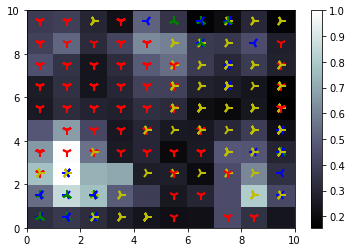

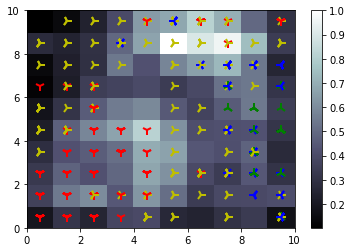

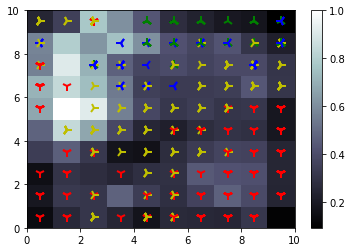

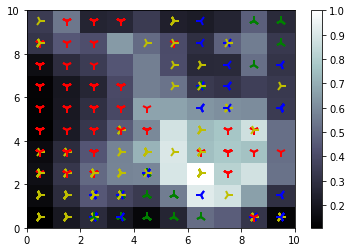

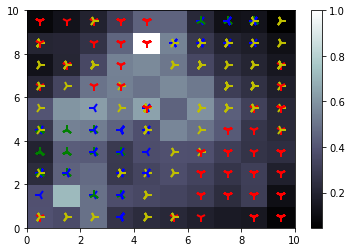

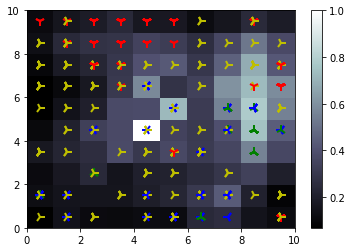

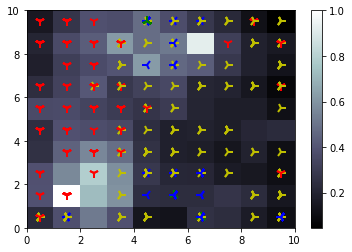

In [8]:
a = bagging(x_train, y_train, x_test, sample_size=0.5, n_LVQ=7)
y_pred = bagging_predict(a, n_row=len(a[0]), n_LVQ=7)

In [9]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred,target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.93      0.62      0.74       331
          1       0.92      0.92      0.92        95
          2       0.42      0.62      0.50        26
          3       0.56      0.83      0.67       205

avg / total       0.79      0.73      0.74       657

